In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
air_lab = pd.read_csv('E:/_0000 Data Analyst Portfolio/2023_OhioTrainDerailment/data/Lab_Results_Air.csv')

In [6]:
air_lab.head()

,Location,Samp_No,SampleDate_txt,SampleTime,Matrix,SampleMedia,Activity,Analytical_Method,CAS_NO,Analyte,Result_Units,Reporting_Limit,Validation_Level,Result_Final_Txt,Result_Qualifier_Final,RL_Comparison
0,DW-B01,EPD-DW-B01-020623,2/6/2023,8:10,Air,Summa Canister,Air,TO-15 SIM,75-71-8,Dichlorodifluoromethane (CFC 12),ug/m3,0.110,Final,3.2,J-,Yes
1,DW-B01,EPD-DW-B01-020623,2/6/2023,8:10,Air,Summa Canister,Air,TO-15 SIM,74-87-3,Chloromethane,ug/m3,0.110,Final,0.26,J-,Yes
2,DW-B01,EPD-DW-B01-020623,2/6/2023,8:10,Air,Summa Canister,Air,TO-15 SIM,75-01-4,Vinyl Chloride,ug/m3,0.055,Final,0.055,UJ,No
3,DW-B01,EPD-DW-B01-020623,2/6/2023,8:10,Air,Summa Canister,Air,TO-15 SIM,106-99-0,"1,3-Butadiene",ug/m3,0.110,Final,0.11,UJ,No
4,DW-B01,EPD-DW-B01-020623,2/6/2023,8:10,Air,Summa Canister,Air,TO-15 SIM,74-83-9,Bromomethane,ug/m3,0.055,Final,<0.055,J-,No


In [9]:
air_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                2446 non-null   object 
 1   Samp_No                 2446 non-null   object 
 2   SampleDate_txt          2446 non-null   object 
 3   SampleTime              2446 non-null   object 
 4   Matrix                  2446 non-null   object 
 5   SampleMedia             2446 non-null   object 
 6   Activity                2446 non-null   object 
 7   Analytical_Method       2446 non-null   object 
 8   CAS_NO                  2446 non-null   object 
 9   Analyte                 2446 non-null   object 
 10  Result_Units            2446 non-null   object 
 11  Reporting_Limit         2446 non-null   float64
 12  Validation_Level        2446 non-null   object 
 13  Result_Final_Txt        2446 non-null   object 
 14  Result_Qualifier_Final  1673 non-null   

In [16]:
air_lab['SampleDate_txt'] = pd.to_datetime(air_lab['SampleDate_txt'])
air_lab['SampleTime'] = pd.to_datetime(air_lab['SampleTime']).dt.time

In [17]:
air_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                2446 non-null   object        
 1   Samp_No                 2446 non-null   object        
 2   SampleDate_txt          2446 non-null   datetime64[ns]
 3   SampleTime              2446 non-null   object        
 4   Matrix                  2446 non-null   object        
 5   SampleMedia             2446 non-null   object        
 6   Activity                2446 non-null   object        
 7   Analytical_Method       2446 non-null   object        
 8   CAS_NO                  2446 non-null   object        
 9   Analyte                 2446 non-null   object        
 10  Result_Units            2446 non-null   object        
 11  Reporting_Limit         2446 non-null   float64       
 12  Validation_Level        2446 non-null   object  

In [18]:
air_lab.groupby(['SampleDate_txt'])['Analyte'].value_counts()

SampleDate_txt  Analyte                       
2023-02-04      1,1,1-Trichloroethane             1
                1,1,2,2-Tetrachloroethane         1
                1,1,2-Trichloroethane             1
                1,1,2-Trichlorotrifluoroethane    1
                1,1-Dichloroethane                1
                                                 ..
2023-03-01      cis-1,3-Dichloropropene           4
                m,p-Xylenes                       4
                o-Xylene                          4
                trans-1,2-Dichloroethene          4
                trans-1,3-Dichloropropene         4
Name: Analyte, Length: 1182, dtype: int64

In [23]:
air_lab.loc[air_lab['Analyte'] == '1,1,1-Trichloroethane'].groupby(['SampleDate_txt'])['Result_Final_Txt'].value_counts()

SampleDate_txt  Result_Final_Txt
2023-02-04      <0.031              1
2023-02-05      <0.031              1
2023-02-06      0.033               1
                0.055               1
                0.074               1
2023-02-08      <0.033              1
2023-02-09      <0.041              1
2023-02-10      <0.032              1
2023-02-11      <0.031              1
2023-02-12      <0.033              1
                <0.035              1
2023-02-13      <0.034              1
                <0.071              1
2023-02-14      <0.034              1
                <0.035              1
2023-02-15      <0.035              1
                <0.036              1
2023-02-16      <0.031              1
                <0.032              1
2023-02-17      <0.033              1
                <0.034              1
2023-02-18      <0.033              1
                <0.034              1
2023-02-19      <0.036              2
2023-02-20      <0.034              1
                <

In [27]:
analytes_list = air_lab['Analyte'].unique()
analytes_list

array(['Dichlorodifluoromethane (CFC 12)', 'Chloromethane',
       'Vinyl Chloride', '1,3-Butadiene', 'Bromomethane', 'Chloroethane',
       'Acrolein', 'Acetone', 'Trichlorofluoromethane',
       '1,1-Dichloroethene', 'Methylene chloride',
       '1,1,2-Trichlorotrifluoroethane', 'trans-1,2-Dichloroethene',
       '1,1-Dichloroethane', 'Methyl tert-butyl ether',
       'cis-1,2-Dichloroethene', 'Chloroform', '1,2-Dichloroethane',
       '1,1,1-Trichloroethane', 'Benzene', 'Carbon Tetrachloride',
       '1,2-Dichloropropane', 'Bromodichloromethane', 'Trichloroethene',
       '1,4-Dioxane', 'cis-1,3-Dichloropropene',
       'trans-1,3-Dichloropropene', '1,1,2-Trichloroethane', 'Toluene',
       'Dibromochloromethane', '1,2-Dibromoethane', 'Tetrachloroethene',
       'Chlorobenzene', 'Ethylbenzene', 'm,p-Xylenes', 'Styrene',
       'o-Xylene', '1,1,2,2-Tetrachloroethane', '1,3,5-Trimethylbenzene',
       '1,2,4-Trimethylbenzene', '1,3-Dichlorobenzene',
       '1,4-Dichlorobenzene', '1,2-

In [45]:
air_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                2446 non-null   object        
 1   Samp_No                 2446 non-null   object        
 2   SampleDate_txt          2446 non-null   datetime64[ns]
 3   SampleTime              2446 non-null   object        
 4   Matrix                  2446 non-null   object        
 5   SampleMedia             2446 non-null   object        
 6   Activity                2446 non-null   object        
 7   Analytical_Method       2446 non-null   object        
 8   CAS_NO                  2446 non-null   object        
 9   Analyte                 2446 non-null   object        
 10  Result_Units            2446 non-null   object        
 11  Reporting_Limit         2446 non-null   float64       
 12  Validation_Level        2446 non-null   object  

In [51]:
air_lab[['SampleDate_txt','Analyte',  'Reporting_Limit','Result_Final_Txt']]

,SampleDate_txt,Analyte,Reporting_Limit,Result_Final_Txt
0,2023-02-06,Dichlorodifluoromethane (CFC 12),0.110,3.2
1,2023-02-06,Chloromethane,0.110,0.26
2,2023-02-06,Vinyl Chloride,0.055,0.055
3,2023-02-06,"1,3-Butadiene",0.110,0.11
4,2023-02-06,Bromomethane,0.055,<0.055
...,...,...,...,...
2441,2023-03-01,"1,2-Dichlorobenzene",0.033,<0.033
2442,2023-03-01,"1,2-Dibromo 3-Chloropropane",0.130,<0.13
2443,2023-03-01,"1,2,4-Trichlorobenzene",0.065,<0.065
2444,2023-03-01,Naphthalene,0.130,<0.13


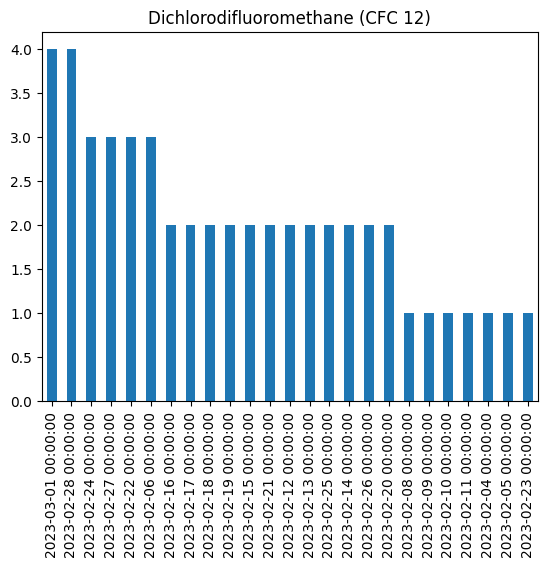

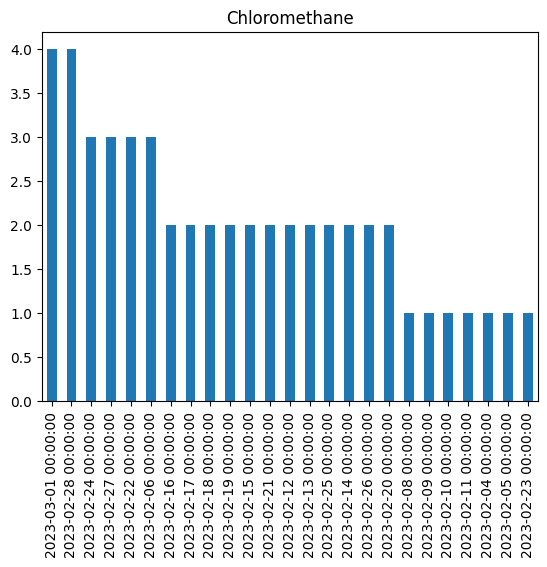

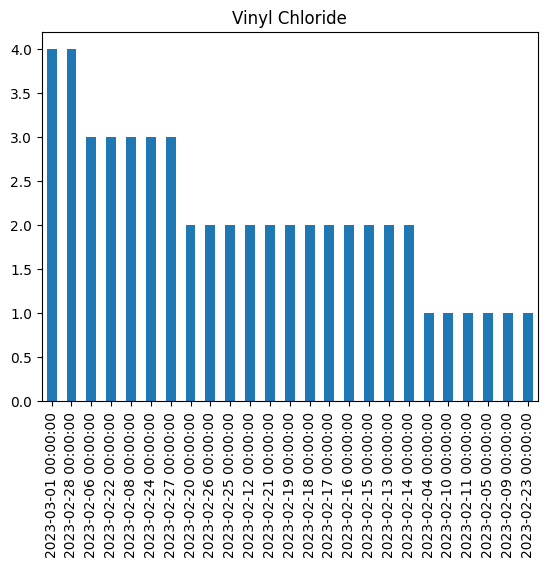

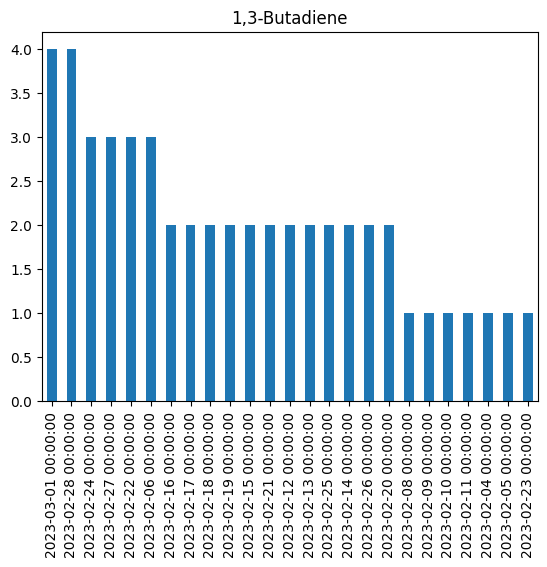

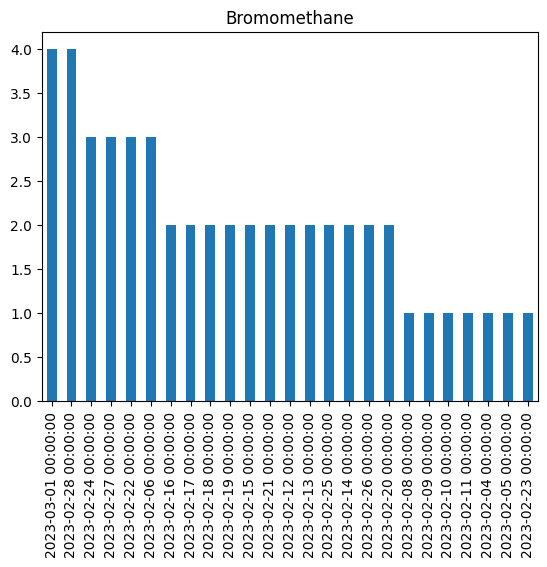

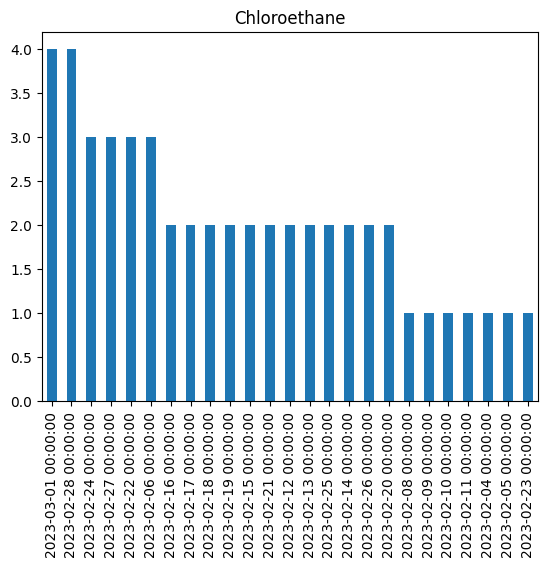

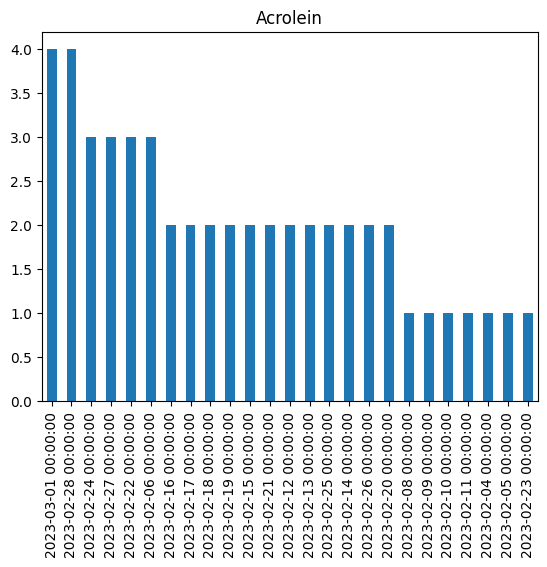

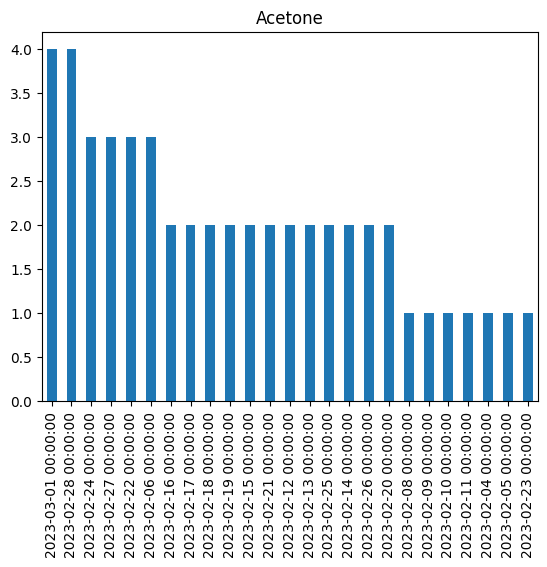

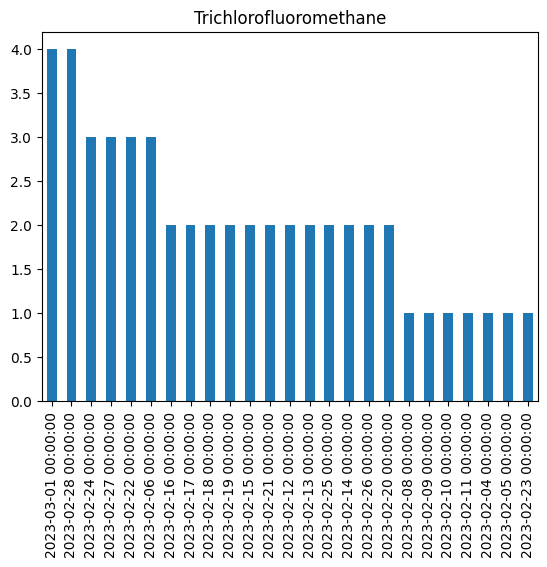

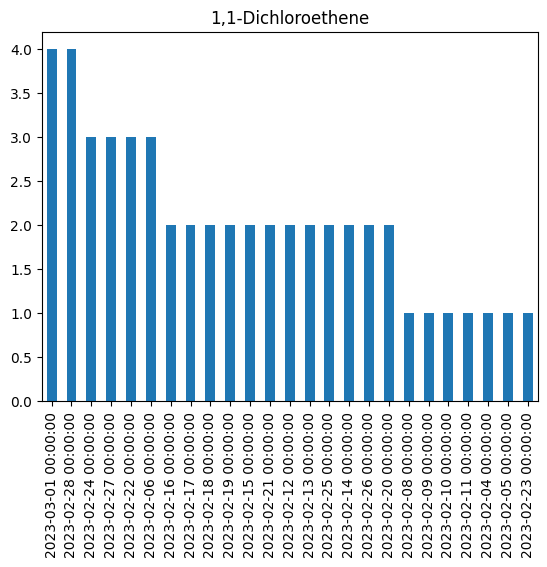

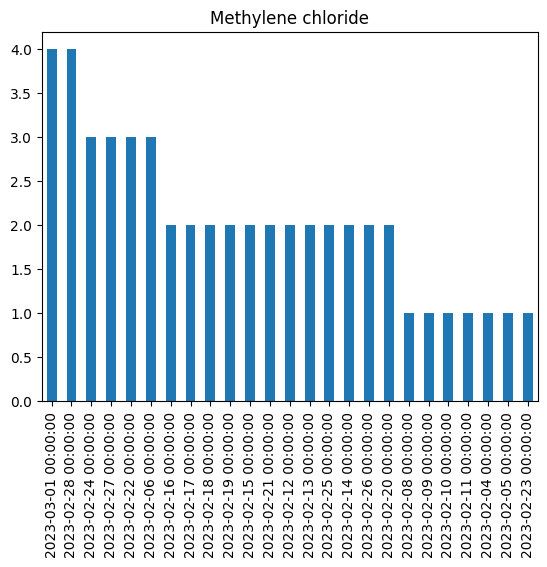

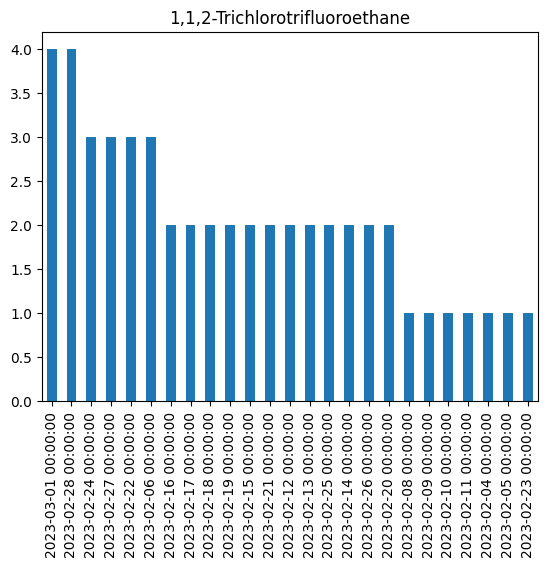

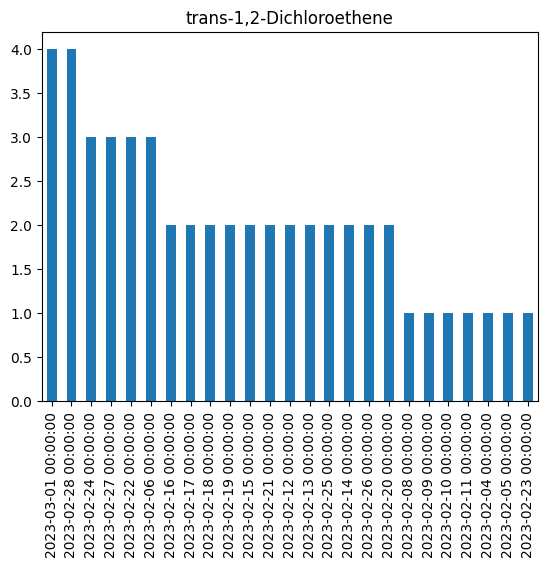

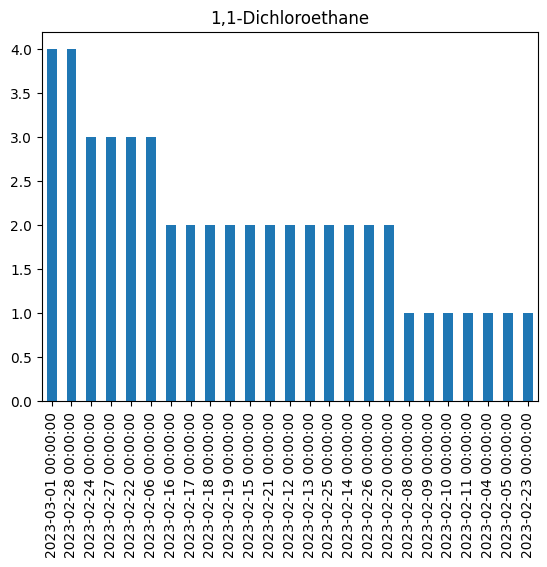

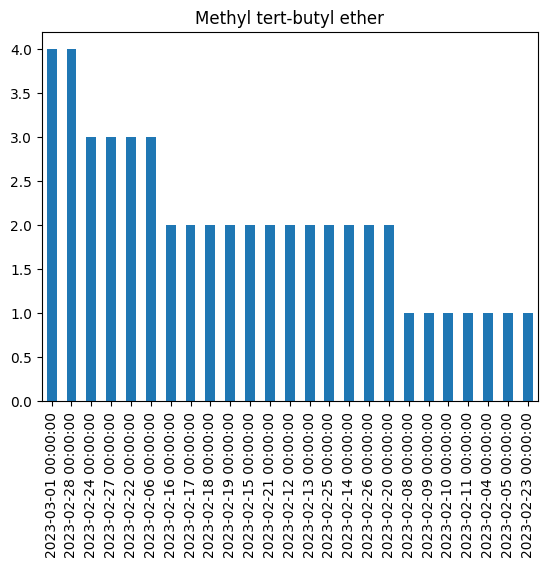

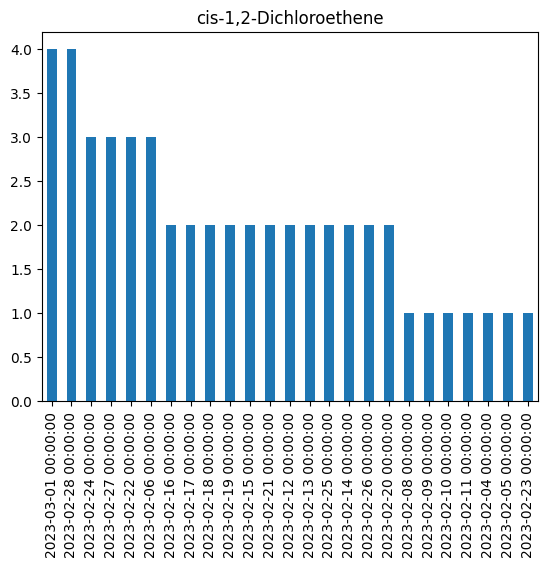

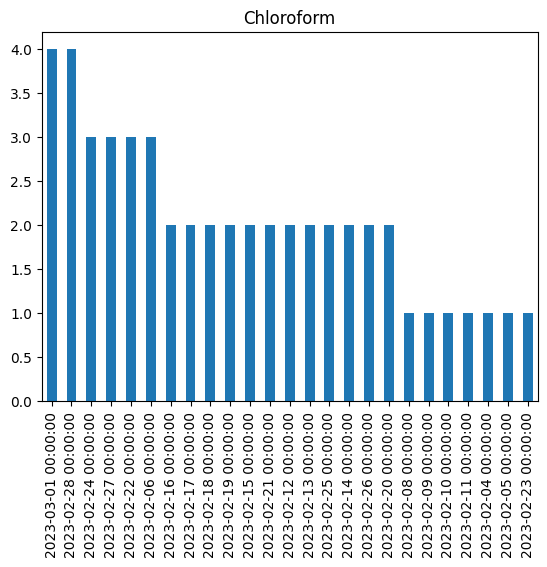

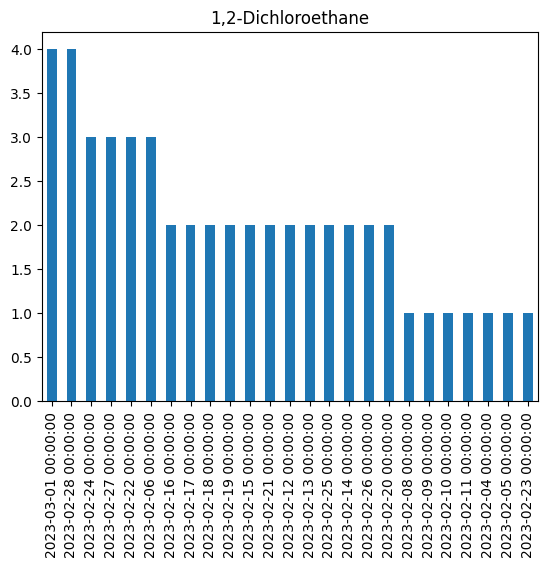

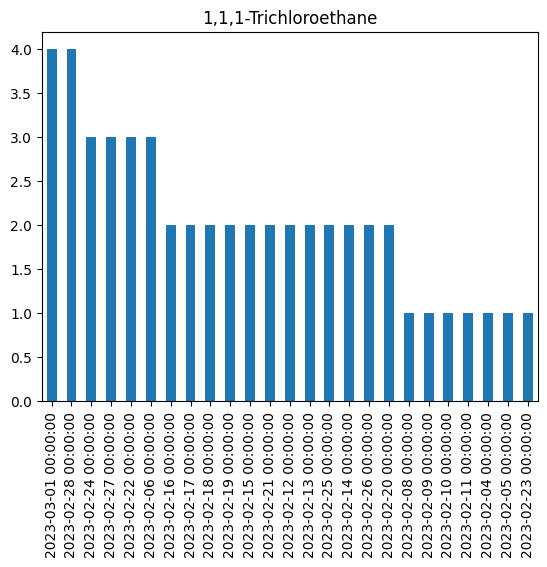

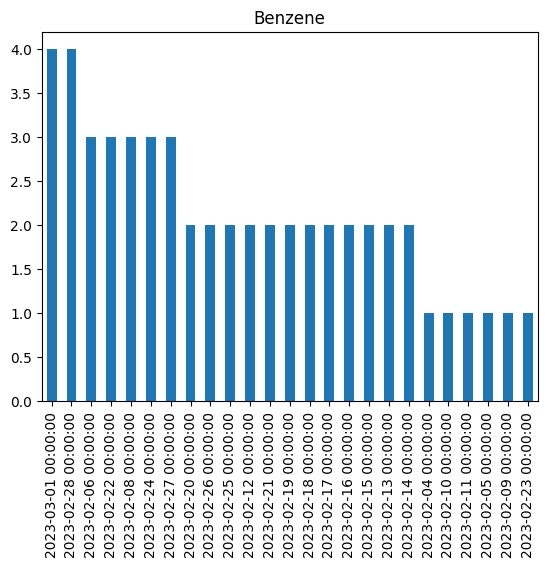

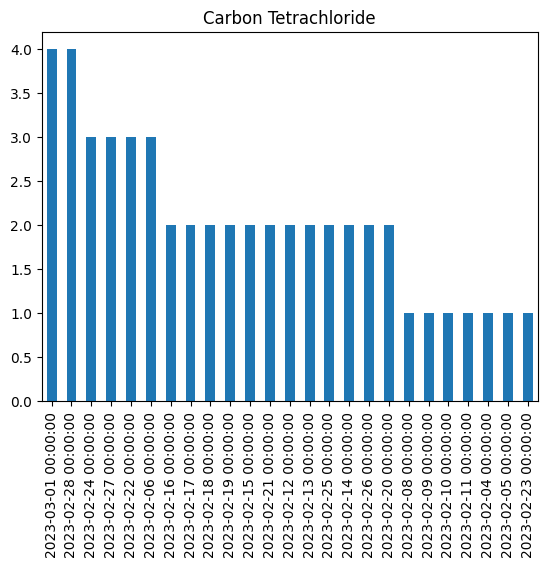

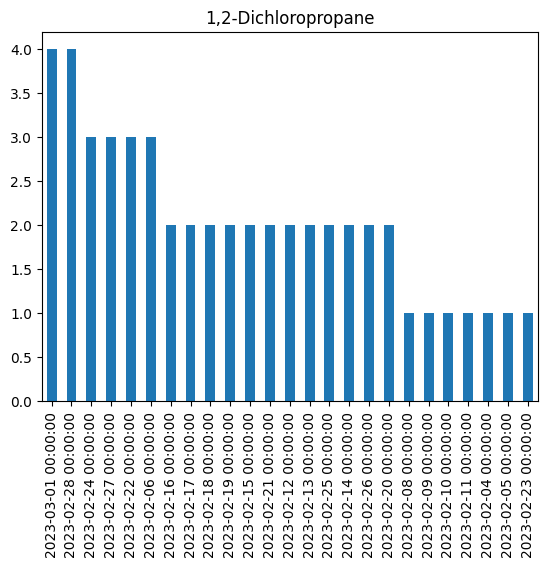

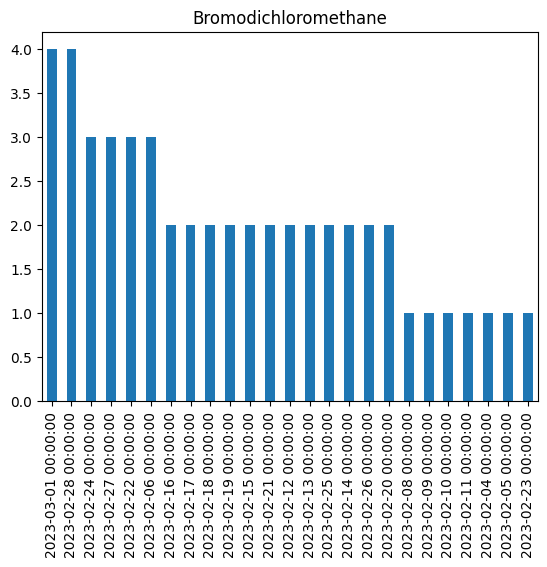

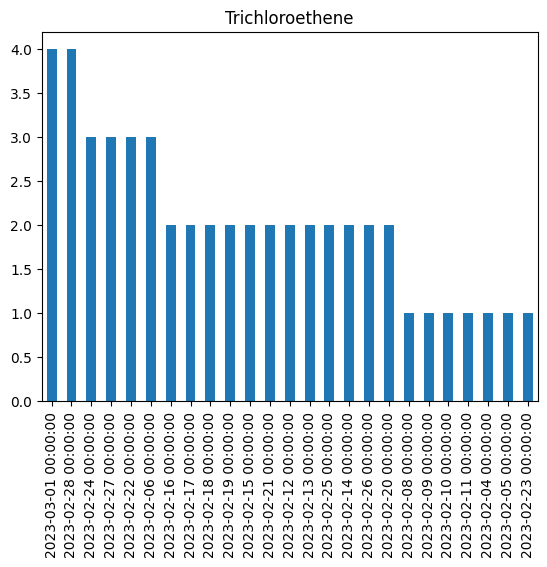

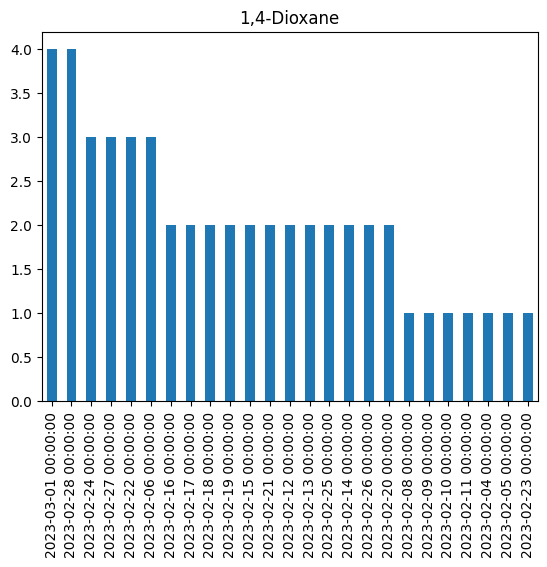

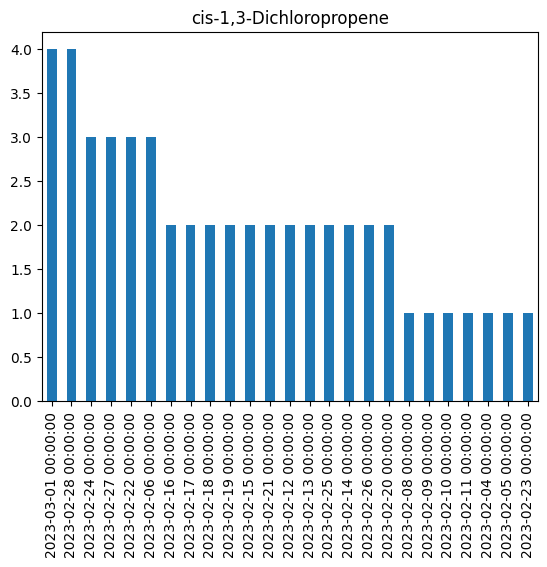

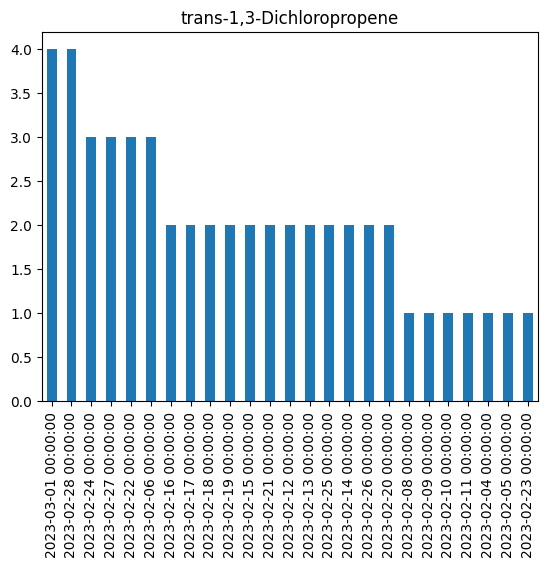

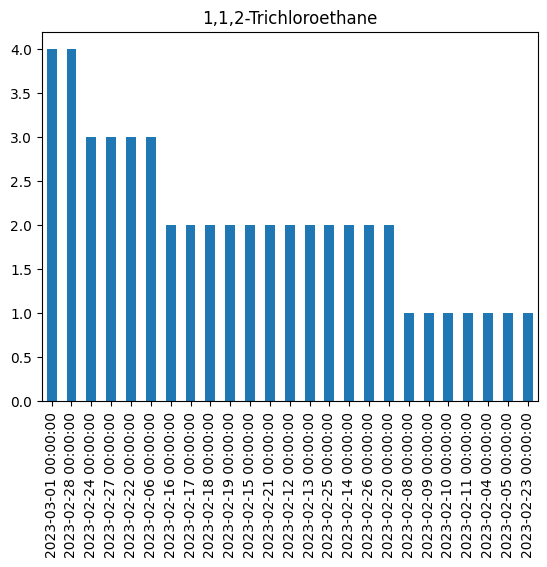

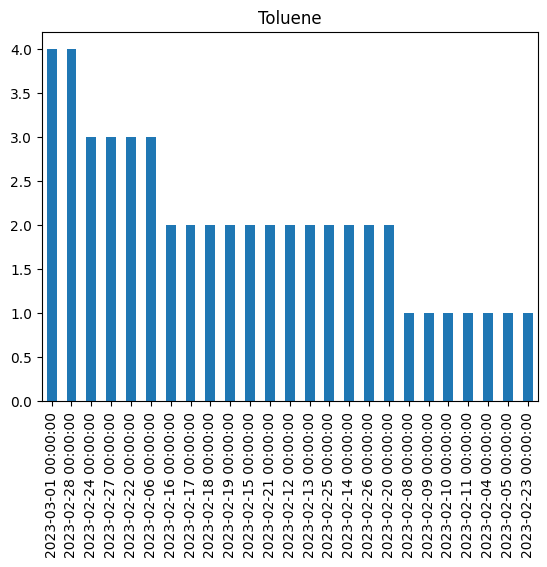

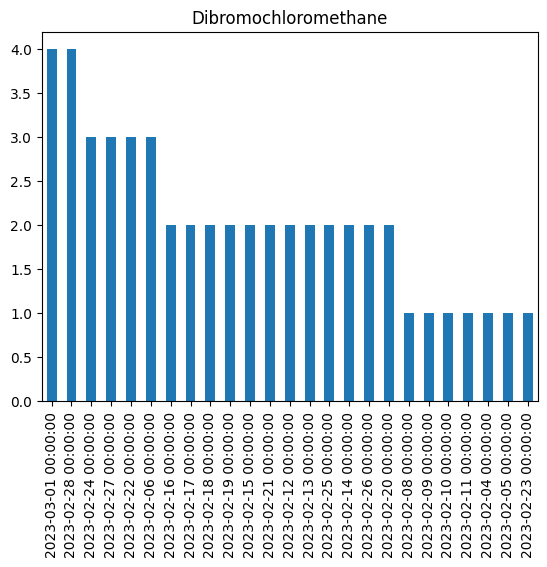

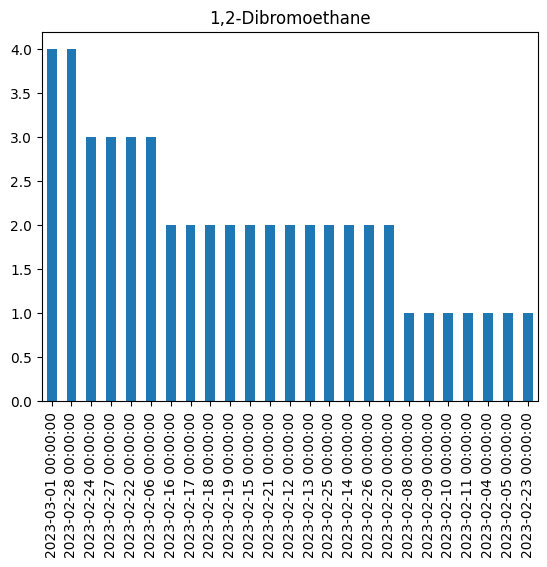

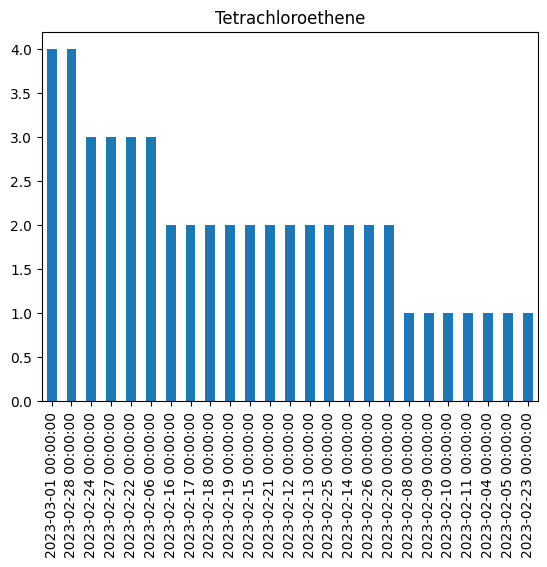

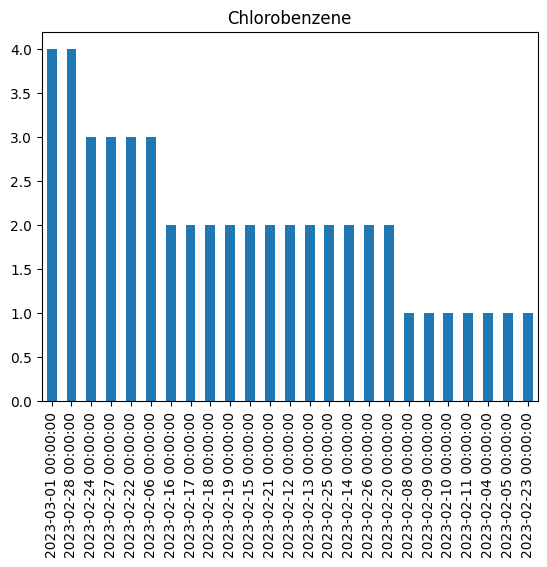

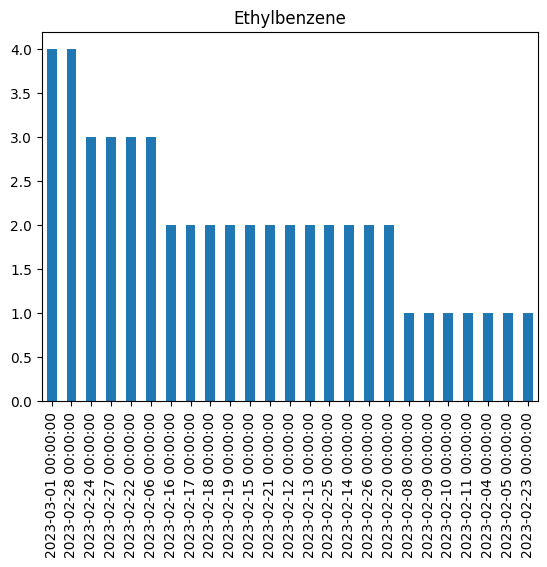

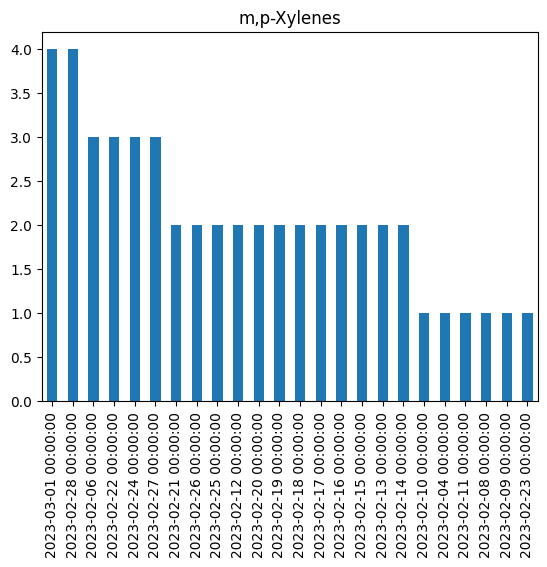

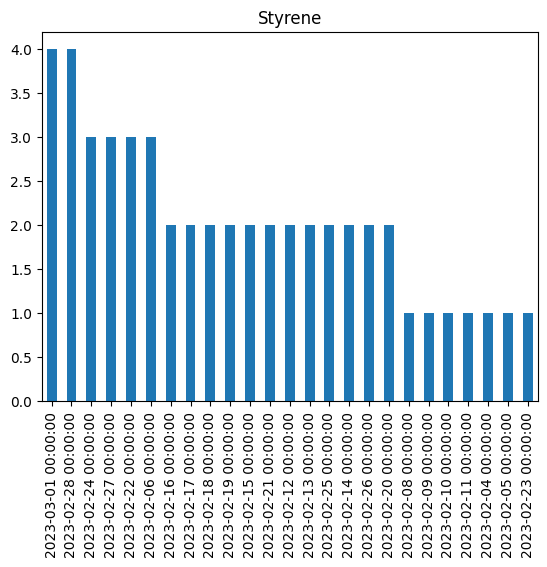

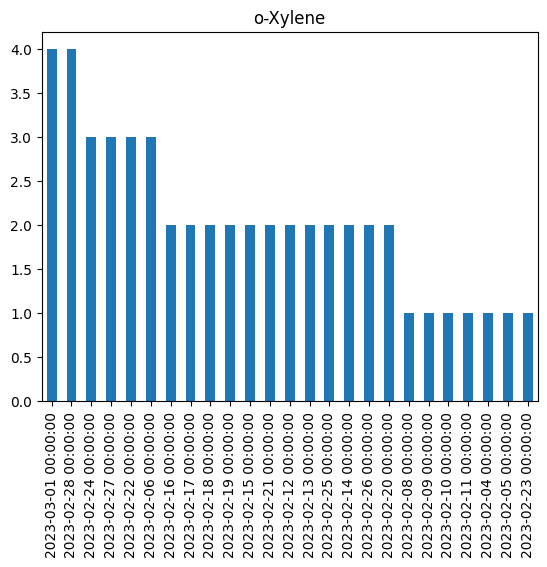

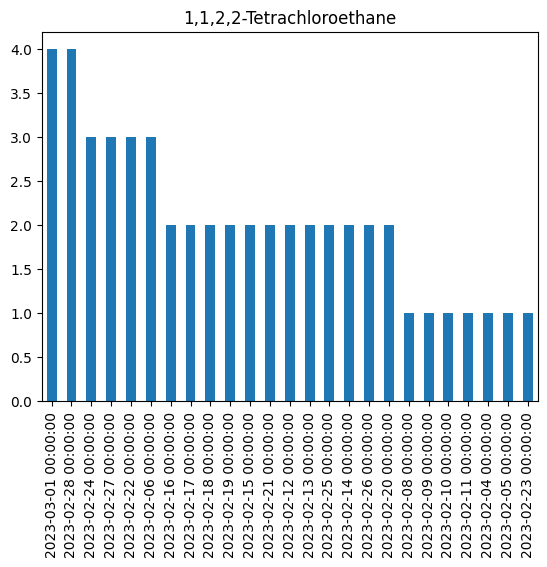

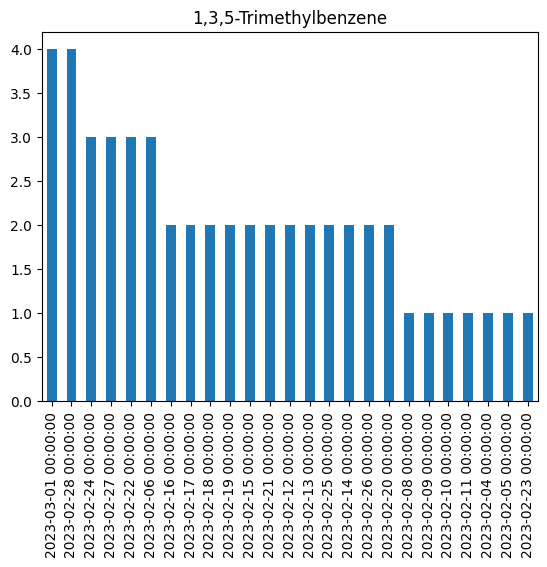

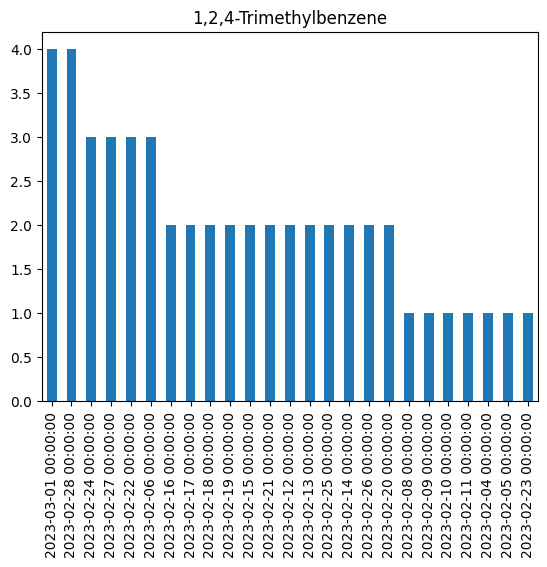

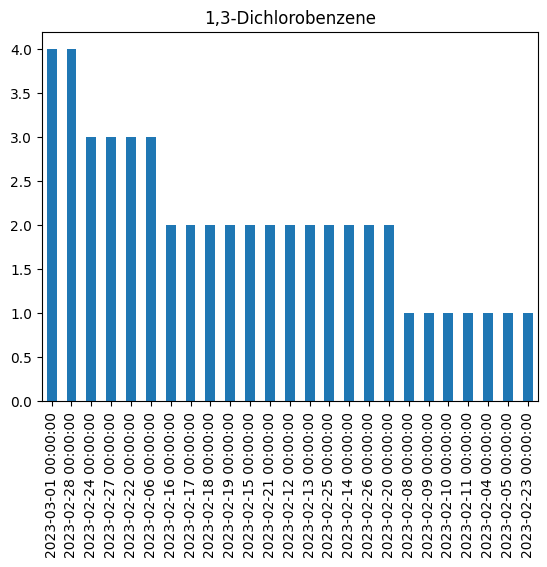

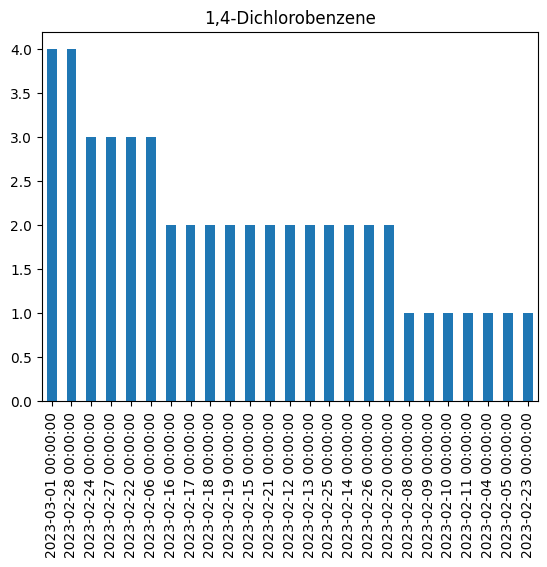

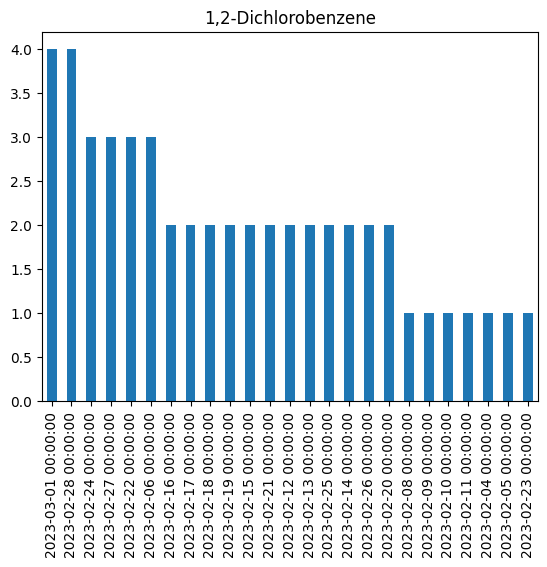

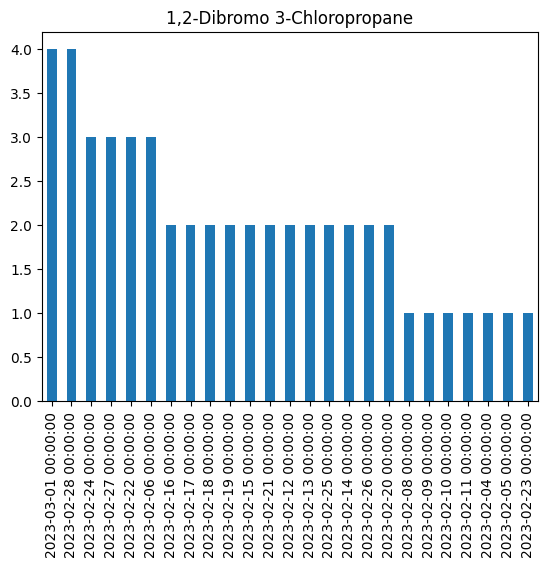

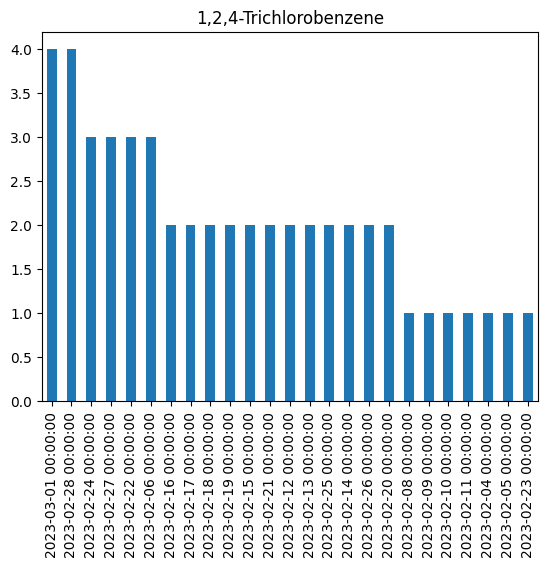

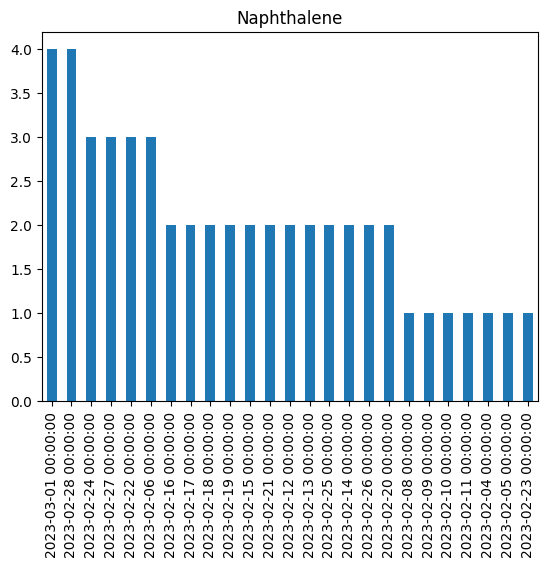

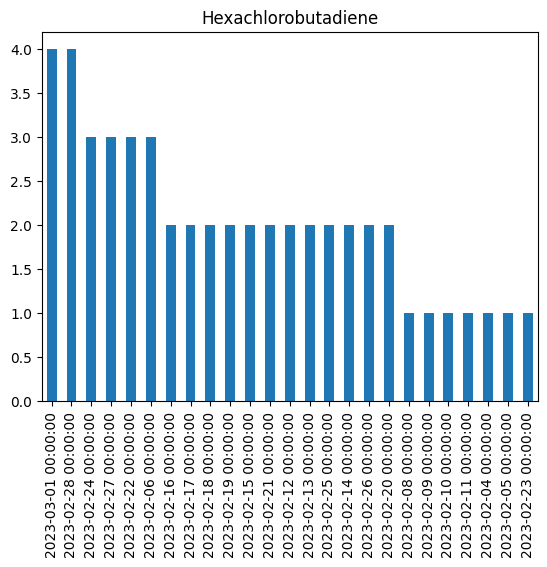

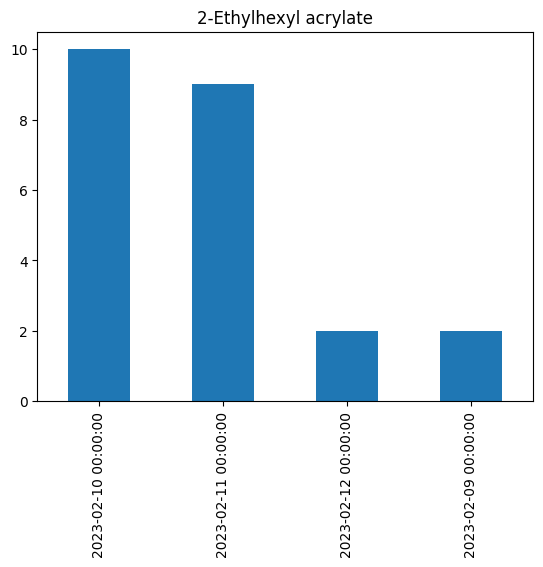

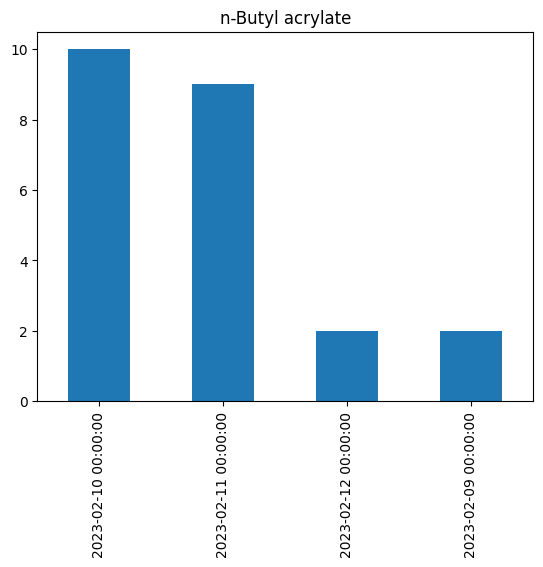

In [44]:
for compound in analytes_list:
    air_lab.loc[air_lab['Analyte'] == compound]['SampleDate_txt'].value_counts().plot(kind='bar', title=compound)
    plt.show();